# Project Title (ADD)

-----------------

**Author:** Alec Reid 

**Student Number:** G00411003

**Date Commenced:** 05/01/26

-----------

**Licences and Rights**

Data used in this project was sourced from Met Éireann Irelands weather service. 

1. Copyright statement: Copyright Met Éireann
2. Source www.met.ie
3. Licence Statement: This data is published under a Creative Commons Attribution 4.0 International (CC BY 4.0). https://creativecommons.org/licenses/by/4.0/
4. Disclaimer: Met Éireann does not accept any liability whatsoever for any error or omission in the data, their availability, or for any loss or damage arising from their use.
5. Where applicable, an indication if the material has been modified and an indication of previous modifications

--------

**References:**

Move to bibolography at end 

- (https://www.met.ie/climate/available-data/historical-data)
- Source for optimal wind speeds https://greenbusinessbarbados.com/what-wind-speed-is-best-for-turbine-efficiency.html
- Wind Speed Thresholds https://www.cedengineering.com/userfiles/R06-004%20-%20Wind%20Energy%20Design%20and%20Fundamentals%20-%20US.pdf?utm_source=chatgpt.com

-------------

## Table of Contents

1. **Introduction**

   1.1 Project Objectives and Research Questions  
   1.2 Scope and Assumptions  

2. **Data Sources and Acquisition**

   2.1 Historical Weather Data (Met Éireann)  
   2.2 Description of Variables and Units  
   2.3 Data Coverage and Time Range  
   2.4 Limitations of Data Sources  

3. **Data Exploration and Understanding**  

   3.1 Dataset Structure and Initial Inspection  
   3.2 Summary Statistics  
   3.3 Missing Values and Data Quality Issues  

4. **Data Cleaning and Normalization**  

   4.1 Handling Missing and Invalid Data  
   4.2 Time and Date Standardization  
   4.3 Unit Conversion and Normalization  
   4.4 Data Aggregation (Hourly, Daily, Monthly, Yearly)  

5. **Wind Speed Analysis**  

   5.1 Spatial Analysis of Wind Speeds by Location  
   5.2 Temporal Analysis (Daily and Seasonal Patterns)  
   5.3 Statistical Distribution of Wind Speeds  
   5.4 Identification of High-Wind Regions  

6. **Wind Farm Suitability Assessment**  

   6.1 Wind Turbine Operating Ranges  
   6.2 Classification of Wind Speeds for Energy Production  
   6.3 Percentage of Time Within Operational Ranges  
   6.4 Time-of-Day and Seasonal Suitability Analysis  

7. **Wind Power Output Estimation**  

   7.1 Wind Power Theory and Equations  
   7.2 Assumptions About Turbine Specifications  
   7.3 Power Output Calculations  
   7.4 Estimated Energy Production Over Time  

8. **Long-Term Wind Speed Trends and Climate Analysis** 

   8.1 Historical Trends in Wind Speeds  
   8.2 Statistical Trend Analysis and Regression  
   8.3 Discussion of Climate Variability  
   8.4 Future Wind Speed Projections  

9. **Analysis of Additional Weather Metrics**  

   9.1 Relationship Between Wind Speed and Temperature  
   9.2 Relationship Between Wind Speed and Rainfall  
   9.3 Correlation Analysis and Interpretation  
   9.4 Impact on Wind Farm Operations  

10. **Data Visualization and Results Presentation**  

    10.1 Time Series Visualizations  
    10.2 Distribution and Heatmap Visualizations  
    10.3 Geographic and Location-Based Visualizations  

12. **Conclusion**  

    12.1 Summary of Results  
    12.2 Implications for Wind Energy in Ireland  

------------

## 1. Introduction
### 1.2 Objectives and Research Questions
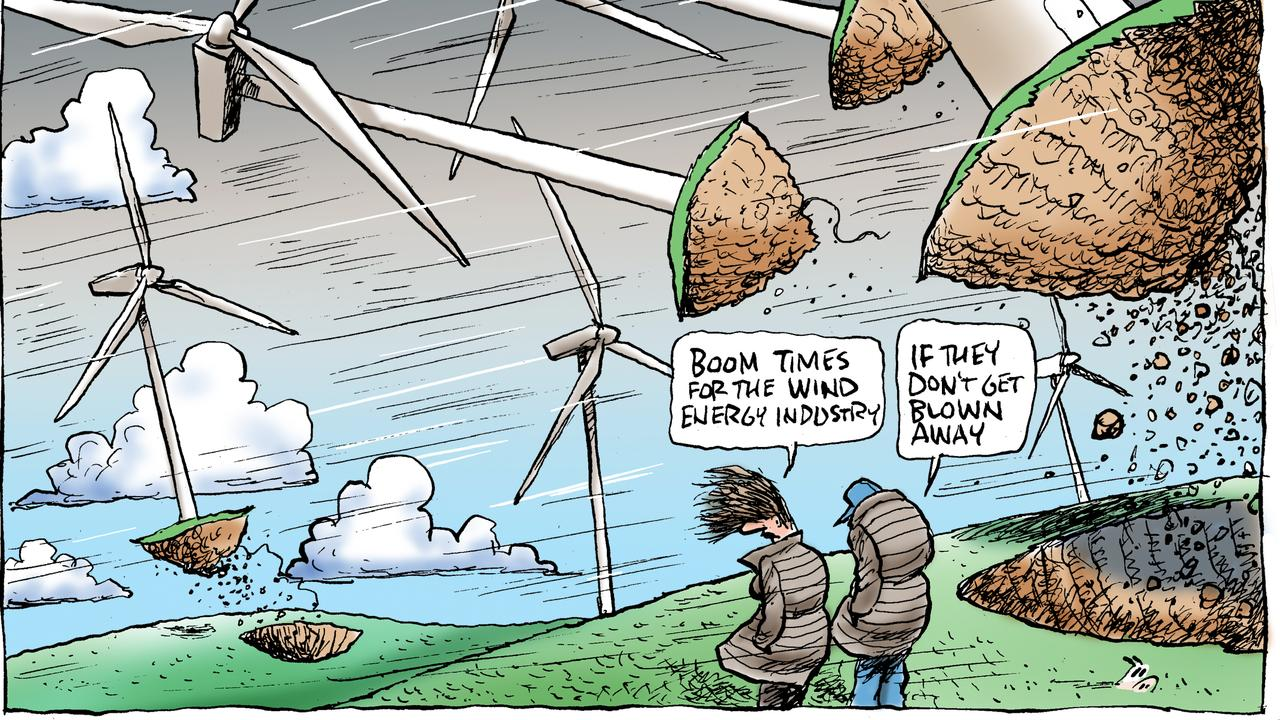 

The research question is simply to determine if using publically available wind speed data we can make an assumption on a given locations suitability to host a windfarm. Where it is assumed that a 'suitable' location is a location that gets enough wind to produce consitent energy without suffering exstenive downtimes or a high liklyhood of damage owing to extrem weather. 

### 1.3 Scope and Assumptions
#### (1.3.1) Scope
The scope of this project includes:
- Analysis of historical wind speed data sourced primarily from publically availabe (Met Éireann) weather stations.
- Temporal analysis covering hourly, daily, monthly, and yearly aggregations.
- Use of simplified wind turbine model to estimate potential power output.

#### (1.3.2) Assumptions
The following assumptions are made in this analysis:
- Weather station data is representative of broader regional wind conditions.
- Wind speed measurements are accurate and consistent across time and locations.
- Turbine specifications are assumed to be constant.
- Effects of terrain, wake losses, turbine degradation, urban areas and grid constraints are not considered.

-----------


## 2. Data Sources and Acquisition

### 2.1 Looking at the Weather Stations - Seeing What Data is Available 


Met Eireann have a good spatial distribution of weather stations across the country with publically accessibly data. They have a csv of all the stations that we can explore to find out more.

In [1]:
#Imports
import zipfile
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os as os

In [2]:
# Read the CSV file, skipping problematic rows as there was some trouble with bad lines 
StationData = pd.read_csv(r'C:\AlecProjects\PFDA_2025_Project-\StationDetails.csv', on_bad_lines='skip')

# Display the first few rows of the dataframe
print(StationData.head())

   county  station name                    name  height(m)  easting  northing  \
0  Antrim          5880         LH_RATHLIN_WEST         10   309200    451800   
1  Carlow          4415     TULLOW (Waterworks)         76   284700    173400   
2  Carlow          2414             BORRIS G.S.         85   272400    150700   
3  Carlow          1214  CARLOW (SUGAR FACTORY)         58   272200    178400   
4  Carlow           115     HACKETSTOWN RECTORY        182   297600    180500   

   latitude  longitude open year close year  
0  55.30083   -6.28028      2000     (null)  
1  52.80528   -6.74306      1985     (null)  
2  52.60278   -6.93056      1944       1991  
3  52.85139   -6.92778      1953       1960  
4  52.86667   -6.55000      1910       1944  


In [3]:
# Have a look at headers
print(StationData.columns)

Index(['county', 'station name', 'name', 'height(m)', 'easting', 'northing',
       'latitude', 'longitude', 'open year', 'close year'],
      dtype='object')


In [4]:
unique_station_names = StationData['station name'].nunique()
print(f"Number of unique station names: {unique_station_names}")

Number of unique station names: 2080


**Drawbacks** 
- I was hoping it the csv on station data would include a heading which outlined the paramters the station recorded - then we could have filtered out the stations not looking at wind.
- I was also hoping it would show the temporal resolution of each station so we could filter out any station that didn't give an hourly resolution.

**Soloution**

Luckily the MetEireann website is interactive so I can use it to refine my search to include only stations with hourly resolution. At this level of resolution only seems to be availble in the principal weather stations around the country. I refined this further to exclude and station that was not operational pre 2025 as we want at least 20 years of hindcast data to look at. This left me with eight stations with a good spatial distribution around the country so these are what we are going to use. I got the 8 station IDs from MET Eireann website so I can filter out there broad data using these:

In [5]:
# Filter the rows for the specified station names
filtered_stations = StationData[StationData['station name'].isin([275, 375, 575, 675, 775, 875, 1275, 1975])]

# Display the filtered rows
print(filtered_stations)

         county  station name           name  height(m)  easting  northing  \
15       Carlow           375       OAK PARK         62   273000    179500   
43        Cavan           675     BALLYHAISE         78   245200    311600   
223        Cork           775  SherkinIsland         21   100781     25801   
366        Cork           575     MOORE PARK         46   181900    101400   
740      Galway           275      MACE HEAD         21    73400    232276   
1573  Roscommon          1975      MT DILLON         39   201306    275240   
1598      Sligo          1275        MARKREE         34   169860    325582   
1851  Westmeath           875      MULLINGAR        101   243000    254300   

      latitude  longitude open year close year  
15    52.86111   -6.91528      2003     (null)  
43    54.05139   -7.30972      2003     (null)  
223   51.47639   -9.42778      2004     (null)  
366   52.16389   -8.26389      2003     (null)  
740   53.32583   -9.90083      2003     (null)  
157

Looks pretty good, good spatial distribtion across the counties - the only stations which might be outliers due to their elevation are those in Westmeath, Cavan and Carlow - but the other stations are located more westerly which get good and crazy winds as well so I think it balances out (for this basic exercise at least)

### (2.2)Mapping Stations: Filtering out Northing and Eastings 

We'll do this so we can export it as a csv and plot the points in QGIS to see how it looks on a map. (Could just )

In [6]:
# Display only the easting northings (I am going to plug these into QGIS to get a visual idea of where these stations are)
filtered_stations_subset = filtered_stations[['station name', 'easting', 'northing']]
print(filtered_stations_subset)

# Export as sperate CSV 
filtered_stations_subset.to_csv(r'C:\AlecProjects\PFDA_2025_Project-\StationDetailsEastingNorthings.csv', index=False)


      station name  easting  northing
15             375   273000    179500
43             675   245200    311600
223            775   100781     25801
366            575   181900    101400
740            275    73400    232276
1573          1975   201306    275240
1598          1275   169860    325582
1851           875   243000    254300


**Spatial Distribution of Staions** 

Add map using QGIS 

### (2.3)Description of how I got the Data
I downloaded the following data for the stations we are going to look at in this project (all data is sourced from MetEireann):
- All weather parameters available.
- Hindcast data for last 20 years.(2005 - 2025)
- Hourly, Daily and Monthly intervals.


------------------

##  (3) Monthly Data Exploration and Analysis ( Example Site: Mace Head_Station 275)

We'll use station 275 as a guine pig to get an idea of what the monthly files look like and what analysis we can perform.

#### (3.1) Monthly Data - Station 275 Initial Inspection and Cleaning

In [7]:
# Load the file 
file_path = r'C:\AlecProjects\PFDA_2025_Project-\Monthly All Stations\mly275.csv'

with open(file_path, 'r', encoding='utf-8') as f:
    for i in range(19):
        print(f"{i+1}: {f.readline().rstrip()}")

1: Station Name: MACE HEAD
2: Station Height: 21 M
3: Latitude:53.326  ,Longitude: -9.901
4: 
5: 
6: year:  -  Year
7: month: -  Month
8: rain:  -  Precipitation Amount (mm)
9: meant: -  Mean Air Temperature (C)
10: maxtp: -  Maximum Air Temperature (C)
11: mintp: -  Minimum  Air Temperature (C)
12: mnmax: -  Mean Maximum Temperature (C)
13: mnmin: -  Mean Minimum Temperature (C)
14: gmin:  -  Grass Minimum Temperature (C)
15: wdsp:  -  Mean Wind Speed (knot)
16: mxgt:  -  Highest Gust (knot)
17: sun:   -  Sunshine duration (hours)
18: ind:   -  Indicator
19: 


**Comment:** No actually weather data in first 23 rows, but it shows us the key for what each abreviation indicates which is useful; looks like we are going to be interested in the following few;
- wdsp:  -  Mean Wind Speed (knot)
- mxgt:  -  Highest Gust (knot)
- We can skip to row 20 to look at the acutual weather data 

In [67]:
# Skip to row 20 as this is where the data headings start
data275 = pd.read_csv(file_path, skiprows=19)

# Display the first few rows of the loaded data
print(data275.head(24))

    year  month meant maxtp mintp mnmax mnmin   rain  gmin  wdsp  maxgt sun
0   2003     11   9.7  16.0   2.8  11.8   7.6  128.1   0.1  17.6     60    
1   2004      1   7.1  11.6  -0.3   9.4   4.9  141.7  -3.1  16.2     64    
2   2004      2   6.5  12.3  -0.9   9.0   4.1         -3.6  13.1     54    
3   2004      3   7.8  13.5   1.6  10.2   5.4         -3.0  16.0     69    
4   2004      4   9.4  14.1   2.1  11.8   7.0   73.1  -0.7  15.1     58    
5   2004      5  11.7  19.2   5.8  14.4   9.1   27.8   0.8  12.3     58    
6   2004      6  13.9  20.8   8.3  16.1  11.7   59.9   3.0  14.2     43    
7   2004      8  15.7  21.8   9.2  18.4  13.0          6.6  12.2     44    
8   2004      9  14.3  22.7   7.9  16.3  12.3   85.2   4.9  18.1     55    
9   2004     10   9.9  14.7   2.5  12.4   7.4  120.0   2.6  14.8     52    
10  2004     11   9.7  12.4   1.1  11.2   8.3   57.5  -1.4  14.2     46    
11  2004     12   8.4  12.0   1.0  10.3   6.5  101.2  -2.2  19.0     57    
12  2005    

In [11]:
# Check the distribution of the 'year' column (We can do this to see the amount of entries for a given year - so we know if it doesn't occur 12 times it is missing a month)
print("\nYear Distribution:")
print(data275['year'].value_counts().sort_index())


Year Distribution:
year
2003     1
2004    11
2005    11
2006    12
2007    10
2008    12
2009    12
2010    12
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017    12
2018    12
2019    12
2020    12
2021    12
2022    12
2023    12
2024    12
2025    11
Name: count, dtype: int64


**Comment:** Some years are incomplete (2003,2004,2005,2007,2025)

In [38]:
# Keep only the columns for wind parameters and their corresponding monthand year
WindOnlyCols = ["year", "month", "wdsp", "maxgt"]
WindOnly = data275[WindOnlyCols]

#Check
print("\nWind Data Subset:")
print(WindOnly.head(20))


Wind Data Subset:
    year  month  wdsp  maxgt
0   2003     11  17.6     60
1   2004      1  16.2     64
2   2004      2  13.1     54
3   2004      3  16.0     69
4   2004      4  15.1     58
5   2004      5  12.3     58
6   2004      6  14.2     43
7   2004      8  12.2     44
8   2004      9  18.1     55
9   2004     10  14.8     52
10  2004     11  14.2     46
11  2004     12  19.0     57
12  2005      1  15.0     73
13  2005      2  12.8     54
14  2005      3  13.0     40
15  2005      5  13.4     47
16  2005      6  11.5     35
17  2005      7  11.5     45
18  2005      8  12.2     48
19  2005      9  15.6     47


**Comment** Lets convert the any empty values to numeric nulls and filter these out

In [39]:
# Make sure the data types are numeric for dropping nulls
cols = ["year", "month", "wdsp", "maxgt"]

WindOnlyNoNulls = (
    WindOnly
    .assign(
        year=lambda d: pd.to_numeric(d["year"], errors="coerce"),
        month=lambda d: pd.to_numeric(d["month"], errors="coerce"),
        wdsp=lambda d: pd.to_numeric(d["wdsp"], errors="coerce"),
        mxgt=lambda d: pd.to_numeric(d["maxgt"], errors="coerce"),
    )
    .dropna(subset=cols)
)

#Now drop the nulls for wind data only
WindOnlyNoNulls = WindOnly.dropna()

In [40]:
# Check Shape to see if any dropped
print("Before:", WindOnly.shape)
print("After:", WindOnlyNoNulls.shape)

print(WindOnlyNoNulls.isna().sum())

Before: (260, 4)
After: (260, 4)
year     0
month    0
wdsp     0
maxgt    0
dtype: int64


**Comment** Looks like nothing was dropped - a bit suspicious of that, but 'I'm going to presume its right because we did the conversion to numeric. For total accuracy we probably should have filtetred out any incomplete years (maybe a job for the future if we come back to this).

#### (3.2) Making Quarters to Divide the Months Up For Easier Analysis

**Comment** By creating quarters we can plot the data easier and identify which sections of the year have the most optimal and least optimal production winds.

In [44]:
# Keep only the relevant columns (make a copy to avoid SettingWithCopyWarning)
df = WindOnlyNoNulls.copy()

# Create a quarter column
df["quarter"] = np.select(
    [
        df["month"].between(1, 3),
        df["month"].between(4, 6),
        df["month"].between(7, 9),
        df["month"].between(10, 12)
    ],
    ["Q1(Jan-Mar)", "Q2(Apr-Jun)", "Q3(Jul-Sep)", "Q4(Oct-Dec)"],
    default=np.nan
)

# Group by year and quarter and calculate mean wdsp and maxgt
quarterly_means = (
    df
    .groupby(["year", "quarter"], as_index=False)
    .agg(
        mean_wdsp=("wdsp", "mean"),
        mean_maxgt=("maxgt", "mean")
    )
)

# Show
print(quarterly_means)

    year      quarter  mean_wdsp  mean_maxgt
0   2003  Q4(Oct-Dec)  17.600000   60.000000
1   2004  Q1(Jan-Mar)  15.100000   62.333333
2   2004  Q2(Apr-Jun)  13.866667   53.000000
3   2004  Q3(Jul-Sep)  15.150000   49.500000
4   2004  Q4(Oct-Dec)  16.000000   51.666667
..   ...          ...        ...         ...
84  2024  Q4(Oct-Dec)  14.866667   68.666667
85  2025  Q1(Jan-Mar)  14.666667   67.666667
86  2025  Q2(Apr-Jun)  12.333333   42.333333
87  2025  Q3(Jul-Sep)  14.433333   49.333333
88  2025  Q4(Oct-Dec)  16.550000   63.500000

[89 rows x 4 columns]


##### (3.2.1) Look at quarterly performance over 5 Years 2020-2025

Thresholds for the values we want to look at using established wind turbine site survying:

These thresholds were sourced from: https://www.cedengineering.com/userfiles/R06-004%20-%20Wind%20Energy%20Design%20and%20Fundamentals%20-%20US.pdf?utm_source=chatgpt.com

**Wind Speeds Thresholds**

| Turbine Stage                 | Wind Speed (m/s) | Wind Speed (knots) | Meaning                         |
| ----------------------------- | ---------------- | ------------------ | ------------------------------- |
| **Cut-in speed**              | 3–4 m/s          | **6–8 knots**      | Turbine starts generating power |
| **Optimal / Efficient range** | 7–12 m/s         | **14–23 knots**    | Best energy production          |
| **Rated speed**               | 12–15 m/s        | **23–29 knots**    | Maximum (rated) power output    |
| **Cut-out speed**             | ~25 m/s          | **≈49 knots**      | Turbine shuts down for safety   |

**Wind Gust Thresholds**

| Gust Category                    | Wind Gust (knots) | Wind Gust (m/s) | Operational Significance                                  |
| -------------------------------- | ----------------- | --------------- | --------------------------------------------------------- |
| **Normal operating gusts**       | < **35 kt**       | < ~18 m/s       | Safe for normal turbine operation                         |
| **High but acceptable gusts**    | **35–45 kt**      | ~18–23 m/s      | Increased mechanical loading; turbines continue operating |
| **Near cut-out conditions**      | **45–49 kt**      | ~23–25 m/s      | Turbine control systems actively limit loads              |
| **Cut-out / shutdown gusts**     | **≥ 49 kt**       | ≥ ~25 m/s       | Turbines shut down to prevent damage                      |
| **Extreme gusts (storm events)** | **≥ 60 kt**       | ≥ ~31 m/s       | Structural design limit; no operation                     |




In [65]:
# Filter quarterly means for years 2019–2024 (5 complete years)
DataQuarterly2019_2024 = quarterly_means[
    (quarterly_means["year"] >= 2019) &
    (quarterly_means["year"] <= 2024)
]

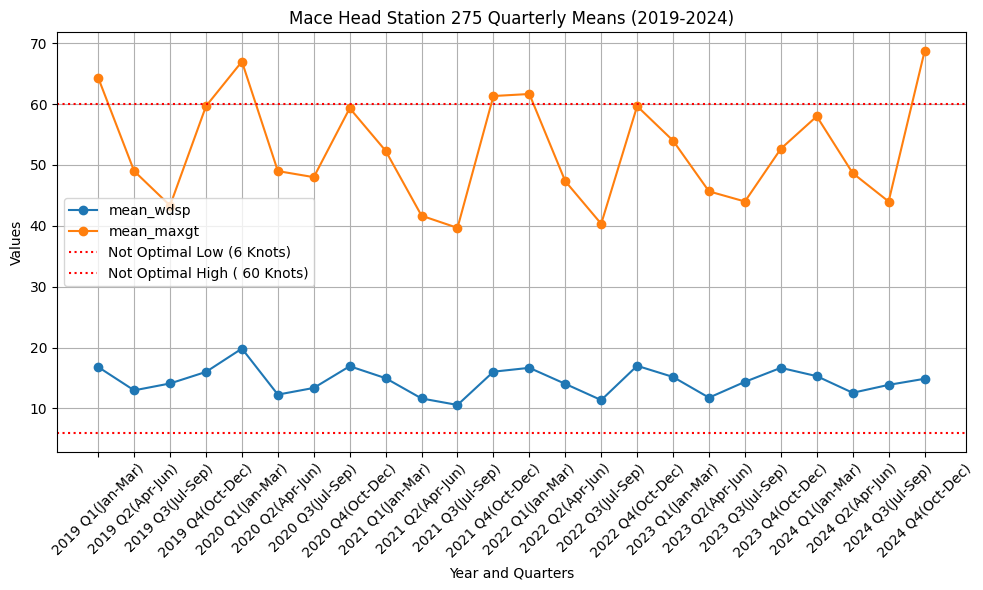

In [77]:
# Plot the data
plt.figure(figsize=(10, 6))
for column in ['mean_wdsp', 'mean_maxgt']:
    plt.plot(DataQuarterly2019_2024['year'].astype(str) + " " + DataQuarterly2019_2024['quarter'], 
             DataQuarterly2019_2024[column], 
             marker='o', 
             label=column)

# Add dotted red lines for 'Not Optimal Low' and 'Not Optimal High'
plt.axhline(y=6, color='red', linestyle='dotted', label='Not Optimal Low (6 Knots)')
plt.axhline(y=60, color='red', linestyle='dotted', label='Not Optimal High ( 60 Knots)')

#plot details
plt.title('Mace Head Station 275 Quarterly Means (2019-2024)')
plt.xlabel('Year and Quarters')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

**Comment** Mace head looks like a great site, but maybe :

- In the 5 year period from 2019 to 2024 it didn't experince any qurter below the not optimal low threshold of 6 knots
- Although it did experience 8 quarters where the mx gusts exceeded 60 knots so likly any turbines would have to be cut off during these stong wind events.

**Research Question for Later** We'll look at the daily data to identify how many days a potential wind farm could have been operational and when it would of had to been cut off. 

#### (3.2.1) Comparing the Overall Quarter Performances: Most Potential Production Per Year vs Most Potential Downtime per Year 

**Most Potential Wind Energy Production Per Year**

- The amount of occurances each quarter experinces the highest mean for wdsp of the year and w the lowest mean wdsp of the year.


In [86]:
# Identify the worst quarter for each year based on mean wind speed
LeastWdspQuarters = (
    quarterly_means
    .loc[
        quarterly_means.groupby("year")["mean_wdsp"].idxmin()
    ]
    .groupby("quarter")
    .size()
    .reset_index(name="Least")
    .sort_values("Least", ascending=False)
)

# Identify the best quarter for each year based on mean wind speed
MostWdspQuarters = (
    quarterly_means
    .loc[
        quarterly_means.groupby("year")["mean_wdsp"].idxmax()
    ]
    .groupby("quarter")
    .size()
    .reset_index(name="Most")
    .sort_values("Most", ascending=False)
)

# Quarter performance summary
quarter_performance = (MostWdspQuarters.merge(LeastWdspQuarters, on="quarter", how="outer").fillna(0))

# Show quarter performance
print(quarter_performance)



       quarter  Most  Least
0  Q4(Oct-Dec)  14.0      1
1  Q1(Jan-Mar)   8.0      1
2  Q3(Jul-Sep)   1.0      6
3  Q2(Apr-Jun)   0.0     15


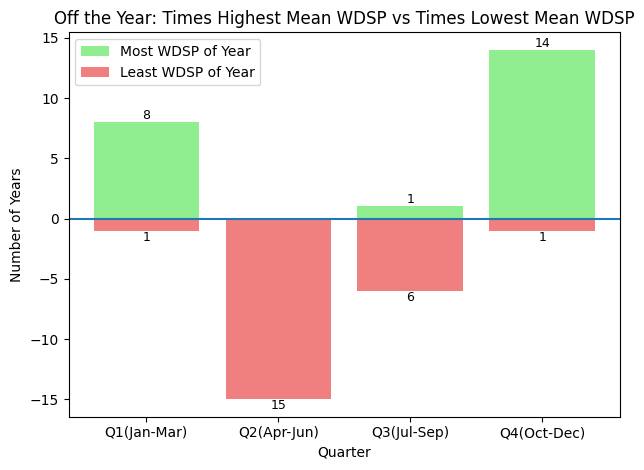

In [91]:
# Ensure quarters are in logical order
quarter_order = ["Q1(Jan-Mar)", "Q2(Apr-Jun)", "Q3(Jul-Sep)", "Q4(Oct-Dec)"]
quarter_performance["quarter"] = pd.Categorical(
    quarter_performance["quarter"],
    categories=quarter_order,
    ordered=True
)
quarter_performance = quarter_performance.sort_values("quarter")

# Numeric x positions
x = np.arange(len(quarter_performance))

plt.figure()

# Plot best quarters (positive)
plt.bar(
    x,
    quarter_performance["Most"],
    label="Most WDSP of Year", color='Lightgreen'
)

# Plot worst quarters (negative)
plt.bar(
    x,
    -quarter_performance["Least"],
    label="Least WDSP of Year", color='Lightcoral'
)

# Zero reference line
plt.axhline(0)

# Add value labels
for xi, best, worst in zip(
    x,
    quarter_performance["Most"],
    quarter_performance["Least"]
):
    if best > 0:
        plt.text(xi, best, f"{int(best)}", ha="center", va="bottom", fontsize=9, )
    if worst > 0:
        plt.text(xi, -worst, f"{int(worst)}", ha="center", va="top", fontsize=9,)

# Axis labels and ticks
plt.xticks(x, quarter_performance["quarter"])
plt.xlabel("Quarter")
plt.ylabel("Number of Years")
plt.title("Off the Year: Times Highest Mean WDSP vs Times Lowest Mean WDSP")
plt.legend()
plt.tight_layout()
plt.show()


**Comment** 
- Q1 and Q4 are most often top the highesht mean wdsp of a year.
- Q2 and Q3 experience the lowest mean wdsp of a year.
- This analysis is quite useful when considering what times of the year we would need to suppliment a windfarm at mace head with other energy sources (e.g coal power plant) **but** it would need to take into consideration when the most cut of times due to high gusts occur, becuase as we say earlier all quarters were idntified as sufficnet for wind energy production at Mace head so it may more be a question of which quarter experieces the least downtime as opposed to which quarter produces the most when operational. 

**Most Potential Downtime**

- The amount of occurances each quarter experinces the a mean for gusts of that exceeds the 60 nots limit.



In [95]:
# Calculate quarterly maximum gusts exceeding 60 kn
quarterly_means["mean_maxgt_exceed_60"] = (
    quarterly_means["mean_maxgt"] > 60
)

# Summarize the number of times each quarter exceeded 60 kn
quarter_exceed_summary = (
    quarterly_means
    .groupby("quarter")
    .agg(
        times_exceed_60=("mean_maxgt_exceed_60", "sum"),
        total_years=("year", "nunique")
    )
    .reset_index()
)

# Show the summary of quarters exceeding 60 kn
print(quarter_exceed_summary)


       quarter  times_exceed_60  total_years
0  Q1(Jan-Mar)               12           22
1  Q2(Apr-Jun)                0           22
2  Q3(Jul-Sep)                0           22
3  Q4(Oct-Dec)                8           23


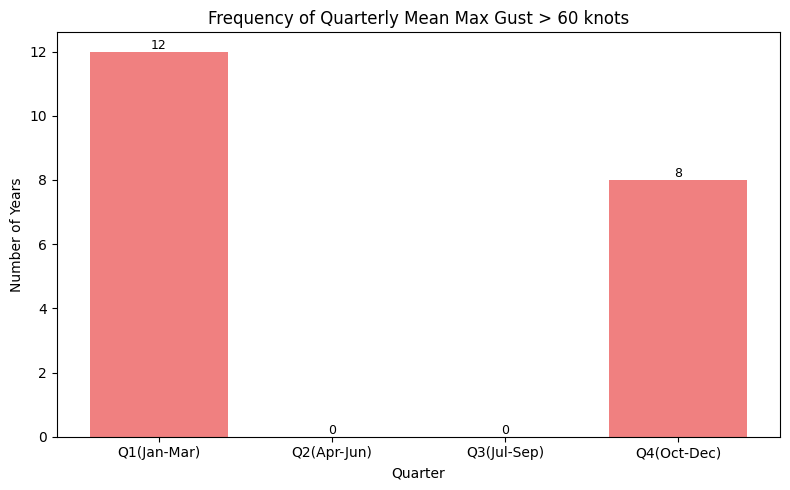

In [100]:
# Plot the frequency of quarters exceeding 60 kn
plt.figure(figsize=(8, 5))
bars = plt.bar(
    quarter_exceed_summary["quarter"],
    quarter_exceed_summary["times_exceed_60"],color='lightcoral'
)

# Add labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,height,f"{int(height)}",ha="center",va="bottom",fontsize=9)

# Plot details
plt.xlabel("Quarter")
plt.ylabel("Number of Years")
plt.title("Frequency of Quarterly Mean Max Gust > 60 knots")
plt.tight_layout()
plt.show()

**Comment** 
- Q1 has experience 12 occurances where the max mean quartetly gusts were over the 60 knots threshold and Q4 experienced 8; so we can assume any windfarm would have suffered a lot of downtime during these high mean quarters.
- Q2 and Q3 have never experienced a max mean quarterly gusts over the threshold so we can assume any windfarm wouldn't have suffered any downtime.

-----------------

### (4) Looking at the Daily Data

Lets look at 275 again as our guine pig - Looking at the csv before doing any analaysis we can see the first 21 rows are a summary of the parameter codes and the real columns start on row 22

In [ ]:
# Load the file 
file_path_275dl = r'C:\AlecProjects\PFDA_2025_Project-\Daily All Stations\dly275.csv'

with open(file_path_275dl, 'r', encoding='utf-8') as f:
    for i in range(21):
        print(f"{i+1}: {f.readline().rstrip()}")

In [ ]:
# Skip to row 22 as this is where the data headings start
data275_daily = pd.read_csv(file_path_275dl, skiprows=22)

# Display the first few rows of the loaded data
print(data275_daily.head(20))

In [ ]:
# Read the CSV file directly specifying the header row #
data275_daily = pd.read_csv("C:\\AlecProjects\\PFDA_2025_Project-\\Daily All Stations\\dly275.csv", header=21)

# Chekc the columns
print(data275_daily.columns)

In [ ]:
WindOnly = ["date", "wdsp", "hg"]

# Drop any null values and convert data types (converting date to datetime, wdsp and hg to numeric so they can be recognised as nulls if absent and for plotting later)
data_275dl_WindOnly = (
    data275_daily
    .assign(
        date=lambda d: pd.to_datetime(d["date"], errors="coerce"), # Change date to datetime format
        wdsp=lambda d: pd.to_numeric(d["wdsp"], errors="coerce"), # chnage wdsp to numeric
        hg=lambda d: pd.to_numeric(d["hg"], errors="coerce"), # change hg to numeric 
    )[WindOnly]
    .dropna(subset=["date", "wdsp", "hg"])
)

# Check
print("\nWind Data Subset:")
print(data_275dl_WindOnly.head(30))

### (1.) Analysis 1: Find the number of Days in each Threshold
- Maybe do a scatter plot

In [ ]:
# Define bins turbine thresholds
bins = [0, 6, 8, 14, 23, 29, np.inf]

# Name the thresholds and define turbine stages
labels = ["Below Cut-in (<6)","Cut-in (6–8)","Sub-optimal (8–14)","Optimal (14–23)","Rated(Max Output) (23–29)","Cut-out (>29)"]

In [ ]:
# Only look at data from 2004 to 2024 so we have a consistent 20 year time period for comparison with other stations 
data_275dl_WindOnly.loc[
    (data_275dl_WindOnly["date"] >= "2004-01-01") &
    (data_275dl_WindOnly["date"] <  "2025-01-01")
]

In [ ]:
# Categorize wind speeds into turbine  stages
data_275dl_WindOnly["275_Daily_Thresholds"] = pd.cut(
    data_275dl_WindOnly["wdsp"],
    bins=bins,
    labels=labels,
    right=False
)

In [ ]:
stage_counts = data_275dl_WindOnly["275_Daily_Thresholds"].value_counts().sort_index()

print(stage_counts)

In [ ]:
# Plot number of days bar chart 
plt.figure()
stage_counts.plot(kind="bar")

# Add call outs for each bar
for i, v in enumerate(stage_counts):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')  

# Chart details
plt.title("Mace Head 275: No. Days in each Threshold")
plt.xlabel("Turbine Threshold (knots)")
plt.ylabel("Number of Days (2004-2024)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
# Calculate percentage of days in each stage
stage_percent = stage_counts / stage_counts.sum() * 100

# Plot percentage bar chart
plt.figure()
stage_percent.plot(kind="bar")
plt.title("Mace Head 275 Percentage of Days in each Threshold")

# Add call outs at top of bars
for i, v in enumerate(stage_percent):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', va='bottom')

# Plot details
plt.xlabel("Turbine Stage")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
# Create summary dataframe
Summary275dl = pd.DataFrame({"Count": stage_counts,"Percentage (%)": stage_percent.round(2)})

# show
print(Summary275dl)

**Comment** This is the key information, if we can get one for station and then make some plots on that 

#### Total Energy Output for 2004-2024

The fundamental formula for wind turbine power is obtained from the kinetic energy of moving air masses. The basic equation for calculating wind power available in the wind is as follows,

P = ½ × ρ × A × V³

Where:

P = Power (watts)

ρ (rho) = Air density (kg/m³)

A = Rotor swept area (m²)

V = Wind speed (m/s)

The equation illustrates the maximum possible energy that can be derived from the wind, but for wind power as a turbine or wind farm output, you need to factor in turbine efficiency and the Betz limit which no wind turbines can achieve more than 59.3 % of the kinetic energy that the wind contains.

Thus, basis the above, the practical formula for wind turbine power output becomes:

P_turbine = ½ × ρ × A × V³ × Cp

Where Cp is the power coefficient, which shows the turbine's efficiency to convert wind energy to electrical energy.

Above formula is sourced directly from : Source: https://kpenergy.in/blog/calculating-power-output-of-wind-turbines

**Assumptions for our purposes**
- We'll assume we have a 360 degree turbind that can always face the correct direction.
- Air Density - We don't have any recorded parameter for air density so we are going to assume it as 1.225kg/m³ (standard sea-level air density)
- Rotor Swept Area - We'll assume a 100 meter rotor diamter which has a sweep area of 7,854 m².
- Power Coefficient - We'll assume the max energy that can be obtained from the wind is only 0,593 (Betz limit)

**Note** Remember we are working with daily data so we will need to multiply by 24 to get a full day's output. 

In [ ]:
# Filter data for operating wind speeds (6 to 29 knots) - Any other time there is no energy being produced 
data_275dl_WindOnly_operating = (
    data_275dl_WindOnly
    .loc[
        (data_275dl_WindOnly["wdsp"] >= 6) &
        (data_275dl_WindOnly["wdsp"] <= 29)
    ]
    .copy()
)


In [ ]:
# Convert wind speed from knots to m/s (knots to m/s = knots * 0.514444)
data_275dl_WindOnly_operating["wdsp_ms"] = data_275dl_WindOnly_operating["wdsp"] * 0.514444

# show
print(data_275dl_WindOnly_operating.head(20))

In [ ]:
# Assumptions
rho = 1.225          # air density (kg/m^3)
A = 7854             # rotor swept area (m^2)
Cp = 0.593           # Betz limit (maximum power coefficient)

# Calculate Power in (W) (Instantaneous Power)
data_275dl_WindOnly_operating["power_W"] = (
    0.5 * rho * A * Cp *
    data_275dl_WindOnly_operating["wdsp_ms"] ** 3
)

# Calculate daily energy production in Wh (power in W * 24 hours)
data_275dl_WindOnly_operating["energy_Wh_day"] = (
    data_275dl_WindOnly_operating["power_W"] * 24
)

# Convert daily energy to Megawatt-hours (MWh)
data_275dl_WindOnly_operating["energy_MWh_day"] = (
    data_275dl_WindOnly_operating["energy_Wh_day"] / 1e6
)

# Show
print(data_275dl_WindOnly_operating[["date", "wdsp_ms", "power_W", "energy_MWh_day"]].head(20)
)

In [ ]:
# Extract year from date for annual calculations
data_275dl_WindOnly_operating["year"] = (data_275dl_WindOnly_operating["date"].dt.year)

# Calculate annual energy production in Megawhatt-hours (MWh)
annual_energy_GWh = (
    data_275dl_WindOnly_operating
    .groupby("year")["energy_MWh_day"]
    .sum()
    .reset_index()
)

# Convert to Gigawatt-hours (GWh)
annual_energy_GWh["energy_GWh"] = (
    annual_energy_GWh["energy_MWh_day"] / 1000
)

# Show annual energy output
annual_energy_GWh = annual_energy_GWh[["year", "energy_GWh"]]

print(annual_energy_GWh)

In [ ]:
# Plot annual energy production bar chart
plt.figure()
plt.bar(annual_energy_GWh["year"], annual_energy_GWh["energy_GWh"])
  
# Plot details
plt.xlabel("Year")
plt.ylabel("Annual Energy Production (GWh)")
plt.title("Estimated Annual Wind Energy Production (2004–2024)")
plt.tight_layout()
plt.show()


Benchmarking the Gwh produciton against industry standards:

The below table was composed using chat gpt - where it derived these averages from https://www.eia.gov/todayinenergy/detail.php?id=52038&utm_source=chatgpt.com


| Capacity factor | Annual energy (GWh) | Interpretation             |
| --------------- | ------------------- | -------------------------- |
| ~25%            | ~6.6 GWh            | Poor / marginal site       |
| ~30%            | ~7.9 GWh            | Typical onshore average    |
| ~35%            | ~9.2 GWh            | Good onshore site          |
| ~40%            | ~10.5 GWh           | Very good / excellent site |


In [ ]:
# Industry averages for comparison against 
Poor = 6.6
Ind_Average = 7.9  
Good = 9.2
Excellent = 10.5

# Plot annual energy production vs 
plt.figure()
plt.bar(
    annual_energy_GWh["year"],
    annual_energy_GWh["energy_GWh"],
    label="Estimated annual energy"
)

# Plot Industry Comparisons 
plt.axhline(y=Poor, color='red', linestyle='dotted', label='Poor (6.6 GWh)')
plt.axhline(y=Ind_Average, color='orange', linestyle='dotted', label='Industry Average (7.9 GWh)')
plt.axhline(y=Good, color='green', linestyle='dotted', label='  Good (10.5 GWh)')
plt.axhline(y=Excellent, color='blue', linestyle='dotted', label=' Excellent (10.5 GWh)')

# Plot details
plt.xlabel("Year")
plt.ylabel("Annual Energy Production (GWh)")
plt.title("Estimated Annual Wind Energy Prod Cap vs Ind Average")

# Move legend to bottom right
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [ ]:
# Calculate total energy produced over the period 2004-2024
total_energy_gwh = annual_energy_GWh['energy_GWh'].sum()
print(f"Total Energy (GWh Mace Head from 2004 -2024): {total_energy_gwh}")

# Convert total_energy_gwh to Wh
total_energy_wh = total_energy_gwh * 1e9  # 1 GWh = 1e9 Wh

# Define Pot of Tea (say one kettle boil is 0.25kwh)
Kettel_Boil = 0.25  

# Calculate number of kettle boils
number_of_pots_tea = total_energy_wh / (Kettel_Boil)
print(f"Number of Pots of Tea Makeable: {number_of_pots_tea:,.0f}")


---------------

### (3) Comparing All All Stations 

#### (3.1) Compare the daily data for all stations:

**Monthly Data Analysis**
- Clean the data - No Nulls, Numeric for Year, WDSP and Gusts 
- Quarterly Perormance Analysis - Identify Which Quarters perfrom best, 

**Daily Data Analysis**
- Clean the data - No Nulls, Numeric for WDSP, Date Time for Date Time
- Operational Thresholds - Categorise Number of Days into Suitabiliy
- Energy Generation - Estimated Annual GWH Production 2004 - 2024, 